In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize


## Exploratory Data analysis

### Text Preprocessing of the title


#### Load data

In [2]:
data = pd.read_excel('/home/thuongpt/setiment/data/Book1.xlsx')

In [45]:
data.head()

,title,label
0,"""Huyện Yên Bình biểu dương, tôn vinh điển hình...",0
1,Danh sách những mẫu smartphone Samsung Galaxy ...,2
2,"""Kinh tế suy thoái, doanh thu của Lenovo giảm ...",2
3,"""Tin vui, cuối cùng thì iPhone 15 Series cũng ...",0
4,Nhận ngay 2 tựa game trị giá 424.000 VNĐ đang ...,0


#### Text Preprocessing

In [3]:
from underthesea import word_tokenize
import string
with open("/home/thuongpt/TextSummation/data/vietnam/vietnamese_stopswword.txt") as f:
  stop_words = f.readlines()
stop_words = [text.strip() for text in stop_words]


In [4]:
def pre_processing(text):
  # Bước 1: Chuyển hết sang viết thường
  if pd.isnull(text):
        return ""
  text = text.strip()
  text = text.lower()

  # Bước 2: Loại bỏ các dấu câu, ký tự đặc biệt
  text = text.translate(str.maketrans('', '', string.punctuation))

  # # Bước 3: Tách từ và loại bỏ stop words
  tokens = word_tokenize(text)
#   tokens = [token for token in tokens if token not in stop_words]

  '''
  Bước 4 (optional): Loại bỏ thông tin ngày tháng (chuyển số thành token đặc biệt <num>)
  do ngày tháng không có ý nghĩa trong việc phân loại tiêu đề báo
  '''
  for i in range(len(tokens)):
    if tokens[i].isnumeric():
      tokens[i] = '<num>' # phải có dấu để đánh dấu là token đặc biệt

  # Bước 5: Nối lại thành câu
  text = ' '.join(tokens)

  return text


In [5]:
title = data["title"][1]
clean_title = pre_processing(title)

print(clean_title)


danh sách những mẫu smartphone samsung galaxy không còn được nhận bản cập nhật phần mềm mới


In [47]:
for i in range(len(data)):
    data['title'][i] = pre_processing(data['title'][i])

/tmp/ipykernel_1199853/1612223475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'][i] = pre_processing(data['title'][i])
/tmp/ipykernel_1199853/1612223475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'][i] = pre_processing(data['title'][i])
/tmp/ipykernel_1199853/1612223475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'][i] = pre_processing(data['title'][i])
/tmp/ipykernel_1199853/16

In [48]:
data.head()

,title,label
0,huyện yên bình biểu dương tôn vinh điển hình t...,0
1,danh sách những mẫu smartphone samsung galaxy ...,2
2,kinh tế suy thoái doanh thu của lenovo giảm tớ...,2
3,tin vui cuối cùng thì iphone <num> series cũng...,0
4,nhận ngay <num> tựa game trị giá <num> vnđ đan...,0


In [49]:
df_pos = data[data['label'] == 0]
df_neu  = data[data['label'] == 1]
df_neg = data[data['label'] == 2]

In [50]:
tweet_All = " ".join(str(review) for review in data.title)
tweet_pos = " ".join(str(review) for review in df_pos.title)
tweet_neu = " ".join(str(review) for review in df_neu.title)
tweet_neg = " ".join(str(review) for review in df_neg.title)

(-0.5, 399.5, 199.5, -0.5)

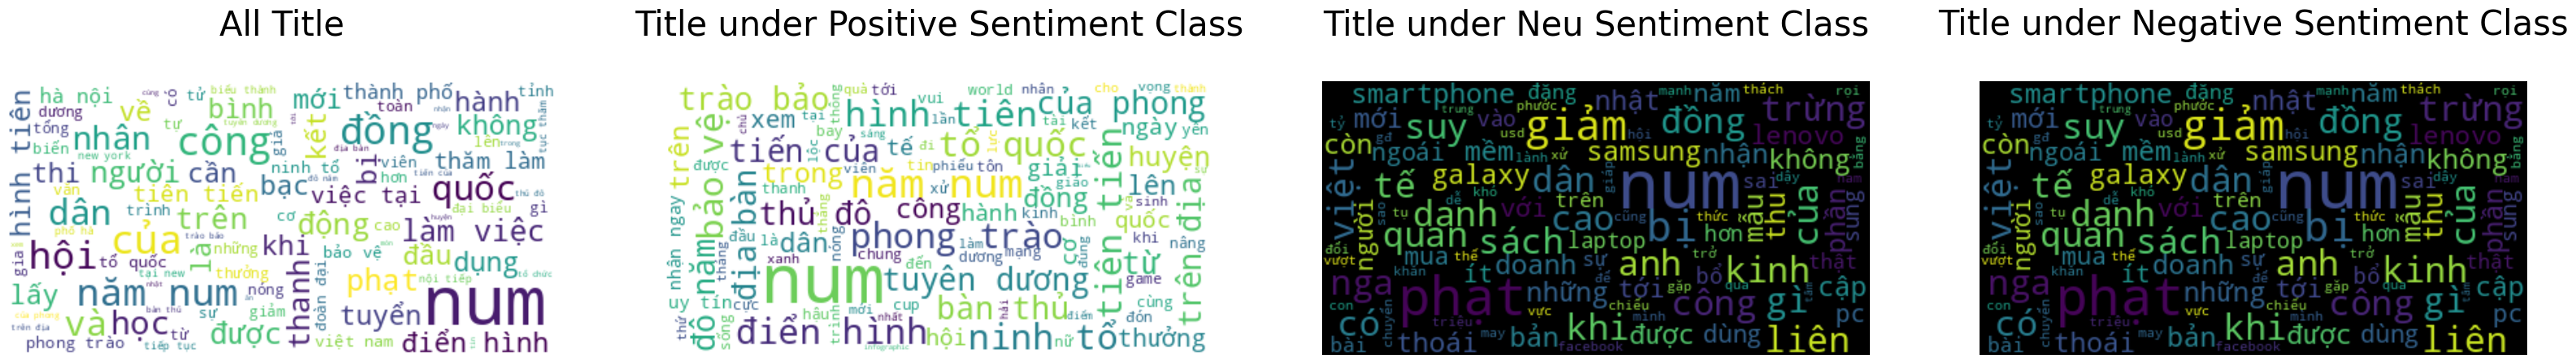

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, ax = plt.subplots(1, 4, figsize  = (40,40))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_pos)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_neu)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_neg)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Title\n', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_pos, interpolation='bilinear')
ax[1].set_title('Title under Positive Sentiment Class\n',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neg, interpolation='bilinear')
ax[2].set_title('Title under Neu Sentiment Class\n',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg, interpolation='bilinear')
ax[3].set_title('Title under Negative Sentiment Class\n',fontsize=30)
ax[3].axis('off')

num: 1.0
năm num: 0.21212121212121213
điển hình: 0.15151515151515152
hình tiên: 0.15151515151515152
tiên tiến: 0.15151515151515152
phong trào: 0.15151515151515152
bảo vệ: 0.15151515151515152
ninh tổ: 0.15151515151515152
tổ quốc: 0.15151515151515152
từ: 0.12121212121212122
tuyên dương: 0.12121212121212122
tiến của: 0.12121212121212122
của phong: 0.12121212121212122
trào bảo: 0.12121212121212122
trên địa: 0.12121212121212122
địa bàn: 0.12121212121212122
bàn thủ: 0.12121212121212122
thủ đô: 0.12121212121212122
đô năm: 0.12121212121212122
huyện: 0.09090909090909091
trong: 0.09090909090909091
đồng: 0.09090909090909091
dân: 0.09090909090909091
công: 0.09090909090909091
lên: 0.09090909090909091
trên: 0.09090909090909091
thưởng: 0.09090909090909091
xem: 0.09090909090909091
ngày: 0.09090909090909091
quốc: 0.09090909090909091
tế: 0.09090909090909091
hội: 0.09090909090909091
cơ: 0.09090909090909091
hành: 0.09090909090909091
giải: 0.09090909090909091
uy tín: 0.09090909090909091
nhận ngay: 0.090909

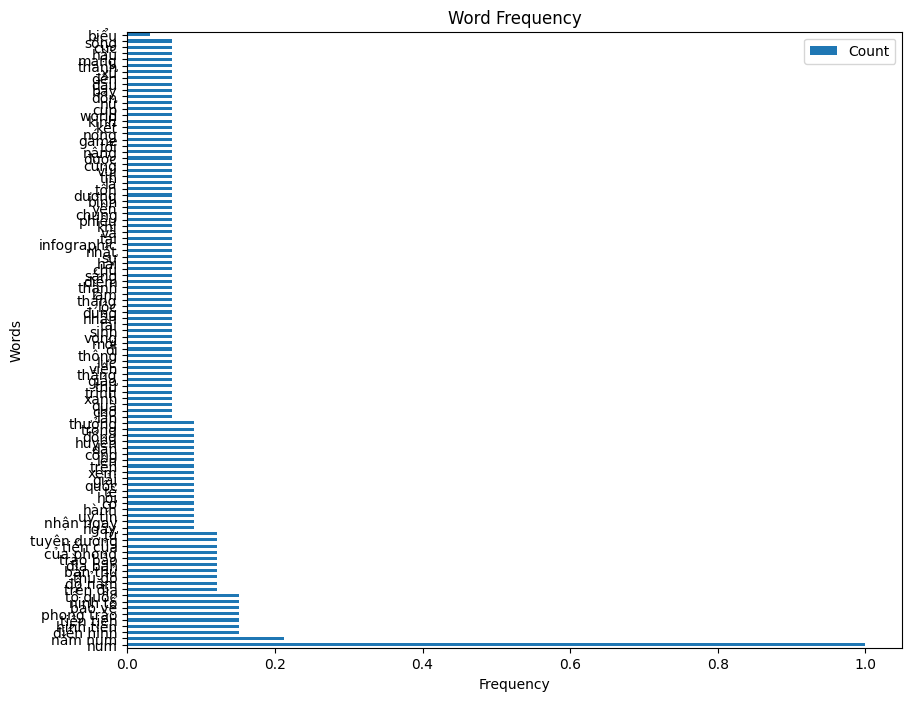

In [54]:

import matplotlib.pyplot as plt

# Count the occurrences of words in the WordCloud
word_counts = wordcloud_pos.words_

# Convert the word counts to a DataFrame
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)
for word, count in word_counts.items():
    print(f"{word}: {count}")

df_word_counts.plot.barh(y='Count', figsize=(10, 8))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency')
plt.show()


In [75]:
data_topic = pd.read_csv("/home/thuongpt/TextSummation/input/data_15032024.csv")

In [76]:
data_topic.head(20)

,title,create_at,content,topic,keyword_topic
0,"Những định hướng, nhiệm vụ trong Chiến lược kh...",2024-02-22T06:23:00.000+07:00,Tài nguyên biển và hải đảo bao gồm tài nguyên ...,Môi trường,"['bảo vệ môi trường', 'ô nhiễm môi trường', 'ô..."
1,Phê duyệt phương án đấu giá quyền sử dụ...,2023-09-01T14:43:00.000+07:00,"Quyết định số 1824/QĐ-UBND ngày 28-8, UBND...",Đất đai,"['giá đất', 'thuê đất', 'sử dụng đất', '..."
2,Đà Nẵng: Công bố đấu giá hàng trăm lô đất tron...,2023-09-02T06:45:00.000+07:00,"Tại quận Cẩm Lệ, đấu giá khu đất A1-14 thuộc...",Đất đai,"['giá đất', 'thuê đất', 'sử dụng đất', '..."
3,Giám sát việc thực hiện các quy định của pháp ...,2023-10-18T15:57:00.000+07:00,"Đồng chí Phạm Quốc Ka, Trưởng Ban Pháp chế HĐN...",Môi trường,"['bảo vệ môi trường', 'ô nhiễm môi trường', 'ô..."
4,Bí thư Tỉnh ủy Tiền Giang Nguyễn Văn Danh: Đầu...,2023-08-29T10:36:00.000+07:00,"(ABO) Chiều 28-8, Ban Thường vụ Tỉnh ủy Tiền G...",Môi trường,"['bảo vệ môi trường', 'ô nhiễm môi trường', 'ô..."
5,Chỉ đạo điều hành của UBND thành phố tuần 35,2023-09-01T15:43:00.000+07:00,Phê duyệt phương án đấu giá quyền sử dụ...,Đất đai,"['giá đất', 'thuê đất', 'sử dụng đất', '..."
6,Chủ tịch UBND thành phố Lê Trung Chinh tiê...,2023-08-23T19:23:00.000+07:00,Chủ tịch UBND thành phố chủ trì buổi ti...,Đất đai,"['giá đất', 'thuê đất', 'sử dụng đất', '..."
7,Chủ tịch UBND thành phố Lê Trung Chinh tiê...,2023-08-23T19:23:00.000+07:00,Chủ tịch UBND thành phố chủ trì buổi ti...,Đất đai,"['giá đất', 'thuê đất', 'sử dụng đất', '..."
8,Cộng đồng tôn giáo chung tay bảo vệ môi trường,2023-10-09T13:00:00.000+07:00,"Đồng hành các cấp chính quyền, Mặt trận và các...",Môi trường,"['bảo vệ môi trường', 'ô nhiễm môi trường', 'ô..."
9,Giới thiệu Tạp chí Kiểm sát số 16/2023,2023-08-22T15:13:00.000+07:00,Trên chuyên mục Nhà nước pháp quyền xã h...,Đất đai,"['giá đất', 'thuê đất', 'sử dụng đất', '..."


In [77]:
colums = ["title", "topic"]
df = data_topic[colums]
df.head()

,title,topic
0,"Những định hướng, nhiệm vụ trong Chiến lược kh...",Môi trường
1,Phê duyệt phương án đấu giá quyền sử dụ...,Đất đai
2,Đà Nẵng: Công bố đấu giá hàng trăm lô đất tron...,Đất đai
3,Giám sát việc thực hiện các quy định của pháp ...,Môi trường
4,Bí thư Tỉnh ủy Tiền Giang Nguyễn Văn Danh: Đầu...,Môi trường


In [78]:
df["topic"].value_counts()

topic
Môi trường          4957
Biến đổi khí hậu    3619
Khoáng sản          2353
Biển đảo          1278
Tài nguyên nước      533
Đất đai              523
Name: count, dtype: int64

In [82]:
df_200 = df.groupby('topic').head(200)

df_200.head()


,title,topic
0,"Những định hướng, nhiệm vụ trong Chiến lược kh...",Môi trường
1,Phê duyệt phương án đấu giá quyền sử dụ...,Đất đai
2,Đà Nẵng: Công bố đấu giá hàng trăm lô đất tron...,Đất đai
3,Giám sát việc thực hiện các quy định của pháp ...,Môi trường
4,Bí thư Tỉnh ủy Tiền Giang Nguyễn Văn Danh: Đầu...,Môi trường


In [84]:
df_200.info()
df_200.to_csv("/home/thuongpt/TextSummation/input/data_200.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 13426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1200 non-null   object
 1   topic   1200 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB
